# Email Spam Classification 


- Dataset

https://archive.ics.uci.edu/ml/datasets/Spambase

- The dataset description:

No null  values





labels:

0:Not Spam 

1:Spam

- Algorithms used:

Neural network(Perceptron)




Importing libraries

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Loading data

In [ ]:
# Loading dataset into pandas dataframe
data = pd.read_csv('/content/spambase.data', names=[x for x in range(58)])

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Data preprocessing

- Type of data attributes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

- Shape of data

In [ ]:
data.shape

(4601, 58)

# Visualization

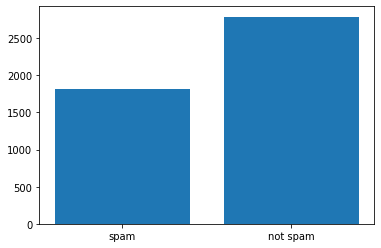

In [ ]:
a=data[57]
b=len(a[a==1])
c=len(a[a==0])
plt.bar(["spam","not spam"],[b,c])
plt.show()

# Selection and training a model

In [ ]:
Y = data[57]
del data[57]
X = data

In [ ]:
Y.value_counts()

0    2788
1    1813
Name: 57, dtype: int64

In [ ]:
# Now lets lets split dataset into train and test set using scikit learn
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42)
# Now using scikit learn lets scale dataset using standardscalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
len(y_test)

1381

In [ ]:
X_train.shape

(3220, 57)

In [ ]:
model = Sequential()
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
a=model.fit(X_train,y_train, epochs=200,validation_split=0.1)

Epoch 1/200
91/91 [==============================] - 1s 4ms/step - loss: 0.8507 - accuracy: 0.4799 - val_loss: 0.6416 - val_accuracy: 0.6553
Epoch 2/200
91/91 [==============================] - 0s 1ms/step - loss: 0.6222 - accuracy: 0.6581 - val_loss: 0.5123 - val_accuracy: 0.7950
Epoch 3/200
91/91 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.8100 - val_loss: 0.4440 - val_accuracy: 0.8696
Epoch 4/200
91/91 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8525 - val_loss: 0.4004 - val_accuracy: 0.8820
Epoch 5/200
91/91 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8790 - val_loss: 0.3728 - val_accuracy: 0.8851
Epoch 6/200
91/91 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.8968 - val_loss: 0.3533 - val_accuracy: 0.8789
Epoch 7/200
91/91 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8921 - val_loss: 0.3369 - val_accuracy: 0.8851
Epoch 8/200
9

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 58        
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


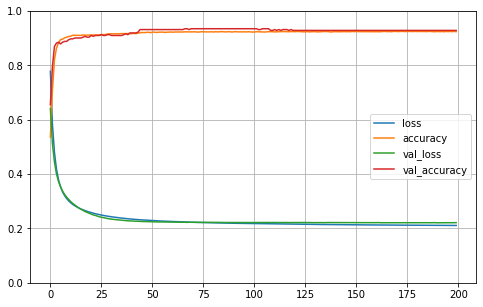

In [ ]:
import pandas as pd
pd.DataFrame(a.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluation

In [ ]:
# Test, Loss and accuracy
loss_and_metrics = model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

44/44 [==============================] - 0s 1ms/step - loss: 0.2183 - accuracy: 0.9225
Loss =  0.2183072865009308
Accuracy =  0.9225199222564697


In [ ]:
pred=model.predict_classes(X_test)
pred=[i for x in pred for i in x]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


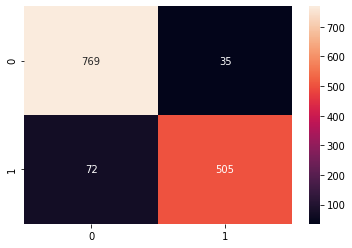

In [ ]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,fmt="d")